In [16]:
import pandas as pd

# Load the datasets from the uploaded files
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# Combine both datasets into a single DataFrame
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Display the first few rows of the dataset and some summary statistics
wine_data.head(), wine_data.describe(), wine_data['quality'].value_counts()


(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  
 0      9.4        5  
 1      9.8        5  
 2 

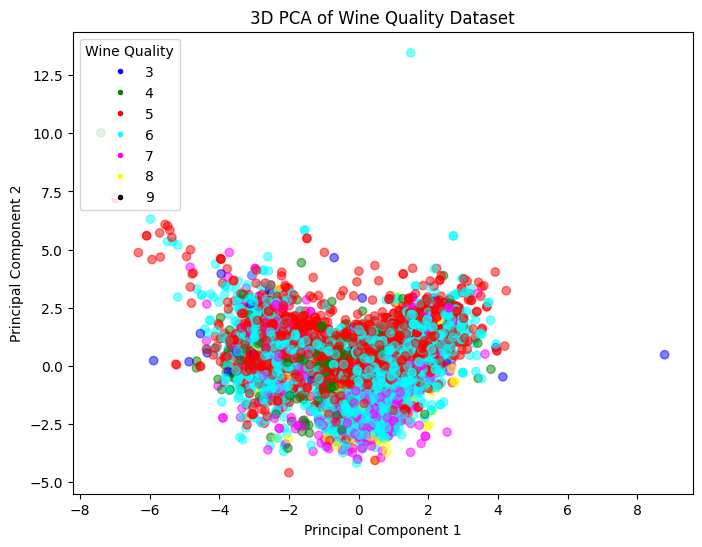

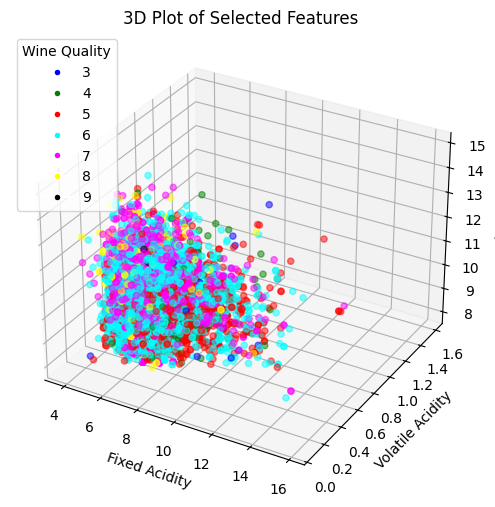

<Figure size 640x480 with 0 Axes>

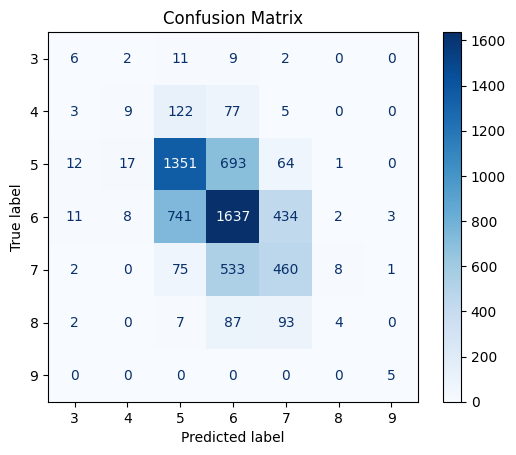

Error Probability: 0.4655995074649838


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Load datasets
red_wine_path = "winequality-red.csv"
white_wine_path = "winequality-white.csv"
red_wine_data = pd.read_csv(red_wine_path, delimiter=';')
white_wine_data = pd.read_csv(white_wine_path, delimiter=';')

# Combine datasets
wine_data = pd.concat([red_wine_data, white_wine_data])

# Separate features and target
features = wine_data.drop('quality', axis=1)
labels = wine_data['quality']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Define a fixed list of colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'lime', 'orange', 'brown']
color_map = {quality: colors[i] for i, quality in enumerate(sorted(labels.unique()))}

# PCA for visualization (reducing to 3 components for a 3D plot)
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_scaled)

# 3D PCA Visualization in a separate figure
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=[color_map[q] for q in labels], alpha=0.5)
# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
# ax.set_title('3D PCA of Wine Quality Dataset')

# # Creating a legend with the quality scores
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[quality], markersize=5, label=quality) for quality in sorted(color_map)]
# ax.legend(handles=handles, title="Wine Quality", loc='upper left')
# plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], c=[color_map[q] for q in labels], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Wine Quality Dataset')

# Creating a legend with the quality scores
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[quality], markersize=5, label=quality) for quality in sorted(color_map)]
ax.legend(handles=handles, title="Wine Quality", loc='upper left')
plt.show()

# 3D Plot of selected features in a separate figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(wine_data['fixed acidity'], wine_data['volatile acidity'], wine_data['alcohol'], c=[color_map[q] for q in labels], alpha=0.5)
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('Alcohol')
ax.set_title('3D Plot of Selected Features')
ax.legend(handles=handles, title="Wine Quality", loc='upper left')
plt.show()

# Estimate class-specific parameters and classify
class_means = {}
class_covariances = {}
class_priors = {}
quality_scores = labels.unique()

for quality in quality_scores:
    class_data = features[labels == quality]
    class_means[quality] = class_data.mean()
    class_covariances[quality] = class_data.cov() + 0.01 * np.eye(class_data.shape[1])  # Regularization
    class_priors[quality] = len(class_data) / len(features)

def classify(sample):
    max_posterior = -np.inf
    chosen_class = None
    for quality in quality_scores:
        mean = class_means[quality]
        cov = class_covariances[quality]
        prior = class_priors[quality]
        likelihood = multivariate_normal(mean, cov).pdf(sample)
        posterior = likelihood * prior
        if posterior > max_posterior:
            max_posterior = posterior
            chosen_class = quality
    return chosen_class

predicted_labels = np.array([classify(row) for index, row in features.iterrows()])
error_probability = 1 - accuracy_score(labels, predicted_labels)
conf_matrix = confusion_matrix(labels, predicted_labels, labels=sorted(quality_scores))

# Visualizing the confusion matrix
plt.figure()
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=sorted(quality_scores))
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Error Probability:", error_probability)


<Figure size 640x480 with 0 Axes>

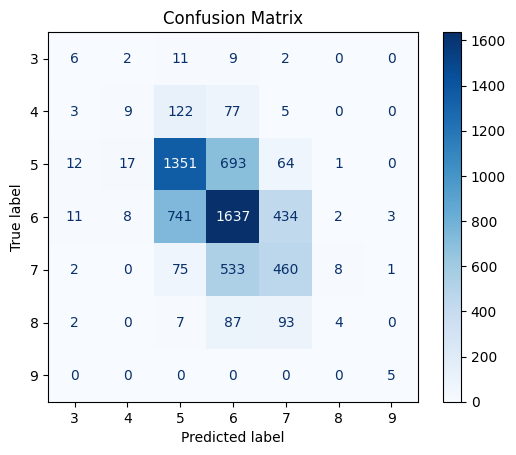

Error Probability: 0.4655995074649838


In [43]:
# Estimate class-specific parameters and classify
class_means = {}
class_covariances = {}
class_priors = {}
quality_scores = labels.unique()

for quality in quality_scores:
    class_data = features[labels == quality]
    class_means[quality] = class_data.mean()
    class_covariances[quality] = class_data.cov() + 0.01 * np.eye(class_data.shape[1])  # Regularization
    class_priors[quality] = len(class_data) / len(features)

def classify(sample):
    max_posterior = -np.inf
    chosen_class = None
    for quality in quality_scores:
        mean = class_means[quality]
        cov = class_covariances[quality]
        prior = class_priors[quality]
        likelihood = multivariate_normal(mean, cov).pdf(sample)
        posterior = likelihood * prior
        if posterior > max_posterior:
            max_posterior = posterior
            chosen_class = quality
    return chosen_class

predicted_labels = np.array([classify(row) for index, row in features.iterrows()])
error_probability = 1 - accuracy_score(labels, predicted_labels)
conf_matrix = confusion_matrix(labels, predicted_labels, labels=sorted(quality_scores))

# Visualizing the confusion matrix
plt.figure()
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=sorted(quality_scores))
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Error Probability:", error_probability)

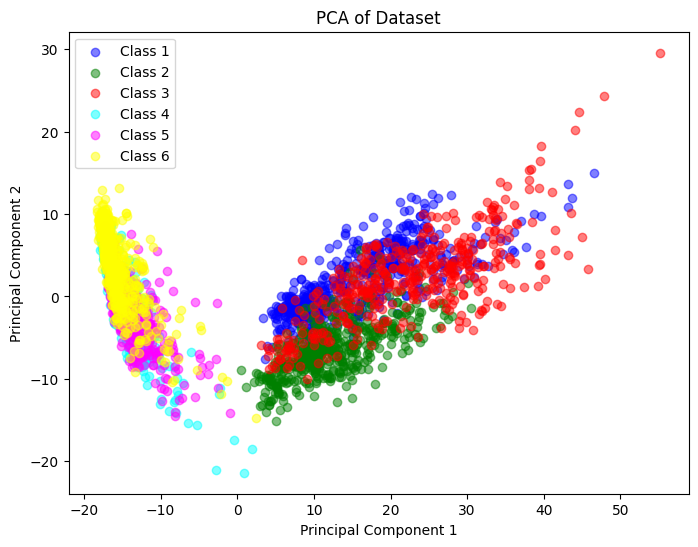


Modeling Assumptions:
1. The class-conditional PDFs of features for each class are assumed to be Gaussian.
2. Class priors are estimated based on the frequency of each class in the dataset.
3. Covariance matrices are regularized to ensure they are well-conditioned.

Influence of Model Choice:
- The Gaussian assumption may not hold true for all features and classes, which can affect the classification performance.
- Regularization helps in making the covariance matrices invertible and stabilizes the model, but the choice of regularization parameter can impact results.
- PCA visualization helps in understanding the data distribution and the separability of classes in reduced dimensions.



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from joblib import Parallel, delayed

# Load datasets
X_test = np.loadtxt("X_test.txt")
y_test = np.loadtxt("y_test.txt")

# Assuming the dataset is balanced, calculate the class priors
classes, class_counts = np.unique(y_test, return_counts=True)
class_priors = {cls: count / len(y_test) for cls, count in zip(classes, class_counts)}

# Standardize the features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Estimate class-specific parameters
class_means = {}
class_covariances = {}

for cls in classes:
    class_data = X_test_scaled[y_test == cls]
    class_means[cls] = np.mean(class_data, axis=0)
    covariance_matrix = np.cov(class_data, rowvar=False)
    # Regularize covariance matrix
    lambda_reg = 0.01
    class_covariances[cls] = covariance_matrix + lambda_reg * np.eye(covariance_matrix.shape[0])

# Classification function using vectorized operations
def classify(sample):
    max_posterior = -np.inf
    chosen_class = None
    for cls in classes:
        mean = class_means[cls]
        cov = class_covariances[cls]
        prior = class_priors[cls]
        likelihood = multivariate_normal(mean, cov).pdf(sample)
        posterior = likelihood * prior
        if posterior > max_posterior:
            max_posterior = posterior
            chosen_class = cls
    return chosen_class

# Apply the classifier to all samples using parallel processing

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)

# 3D PCA Visualization
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_test, alpha=0.5, cmap='viridis')
# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
# ax.set_title('3D PCA of Dataset')
# plt.colorbar(scatter, ax=ax, label='Classes')
# plt.show()


colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
color_map = {cls: colors[i % len(colors)] for i, cls in enumerate(classes)}

# 3D PCA Visualization with separate colors for each class
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Plot each class with a separate color
for cls in classes:
    indices = np.where(y_test == cls)
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], 
               color=color_map[cls], label=f'Class {int(cls)}', alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Dataset')
ax.legend()
plt.show()



# Discuss the modeling assumptions and the influence of model choice
print("""
Modeling Assumptions:
1. The class-conditional PDFs of features for each class are assumed to be Gaussian.
2. Class priors are estimated based on the frequency of each class in the dataset.
3. Covariance matrices are regularized to ensure they are well-conditioned.

Influence of Model Choice:
- The Gaussian assumption may not hold true for all features and classes, which can affect the classification performance.
- Regularization helps in making the covariance matrices invertible and stabilizes the model, but the choice of regularization parameter can impact results.
- PCA visualization helps in understanding the data distribution and the separability of classes in reduced dimensions.
""")


<Figure size 640x480 with 0 Axes>

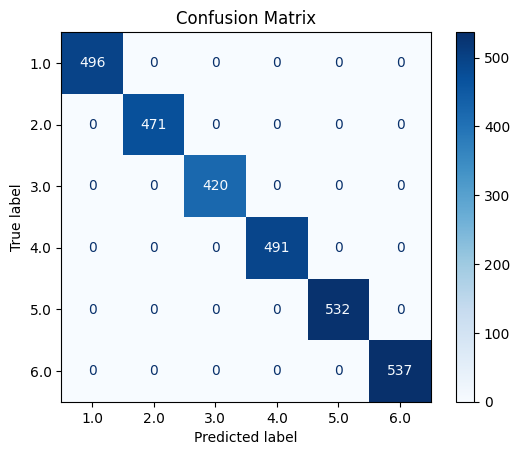

Error Probability: 0.0


In [10]:
predicted_labels = Parallel(n_jobs=-1)(delayed(classify)(sample) for sample in X_test_scaled)

# Calculate error probability
error_probability = 1 - accuracy_score(y_test, predicted_labels)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels, labels=classes)

# Visualizing the confusion matrix
plt.figure()
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=classes)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Error Probability:", error_probability)
